one dimensional graphene strip with zigzag boundaries

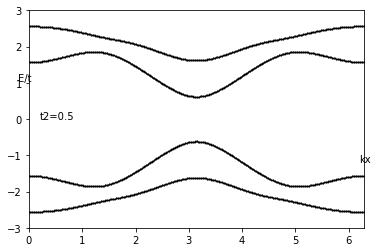

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath 
import functools

def sz(spin):
#turn spin number into z projection of spin
    if spin == 0 : 
    #spin up
        return 1
    if spin == 1 :
    #spin down
        return -1
    else :
        print("Wrong spin.")

def KMHam(N,t,t2,k):
#N 4-atom inferior struture in a cell, with nearest hopping term t and second nearest t2, k
    Ham = np.zeros((4*2*N,4*2*N),dtype = complex)
    #m is the order of inferior structure, num is the number of atom, spin=0 shows spin up,1 shows spin down
    #nearest hopping
    for spin in range(2):
        #intra cell
        #intra struture
        for m in range(N):
            for num in range(3):
                Ham[8*m+2*num+spin, 8*m+2*(num+1)+spin] = t
        #inter structure
        for m in range(N-1):
            Ham[8*m+2*3+spin, 8*(m+1)+2*0+spin] = t
        #inter cell
        for m in range(N):
            Ham[8*m+2*0+spin, 8*m+2*1+spin] = Ham[8*m+2*0+spin, 8*m+2*1+spin] + t* cmath.exp(-k*1j)
            Ham[8*m+2*2+spin, 8*m+2*3+spin] = Ham[8*m+2*2+spin, 8*m+2*3+spin] + t* cmath.exp(k*1j)
            
    #second nearest hopping
    for spin in range(2):
        #intra cell
        #intra struture
        for m in range(N):
            Ham[8*m+2*0+spin, 8*m+2*2+spin] = -1j * t2 * sz(spin)
            Ham[8*m+2*1+spin, 8*m+2*3+spin] = -1j * t2 * sz(spin)
        #inter structure
        for m in range(N-1):
            Ham[8*m+2*2+spin, 8*(m+1)+2*0+spin] = 1j * t2 * sz(spin)
            Ham[8*m+2*3+spin, 8*(m+1)+2*1+spin] = 1j * t2 * sz(spin)
        #inter cell (leading diagonal will be calculated respectively after fill the lower half of matrix)
        for m in range(N):
            Ham[8*m+2*0+spin, 8*m+2*2+spin] = Ham[8*m+2*0+spin, 8*m+2*2+spin] + 1j * t2 * sz(spin) * cmath.exp(-k*1j)
            Ham[8*m+2*1+spin, 8*m+2*3+spin] = Ham[8*m+2*1+spin, 8*m+2*3+spin] + 1j * t2 * sz(spin) * cmath.exp(k*1j)
        for m in range(N-1):
            Ham[8*m+2*2+spin, 8*(m+1)+2*0+spin] = Ham[8*m+2*2+spin, 8*(m+1)+2*0+spin] -1j * t2 * sz(spin)* cmath.exp(k*1j)
            Ham[8*m+2*3+spin, 8*(m+1)+2*1+spin] = Ham[8*m+2*3+spin, 8*(m+1)+2*1+spin] -1j * t2 * sz(spin)* cmath.exp(-k*1j)
        
    Ham = Ham + Ham.conj().T
    #leading diagonal
    for m in range(N):
        for spin in range(2):
            Ham[8*m+2*0+spin, 8*m+2*0+spin] = -2*t2*sz(spin)*math.sin(k)
            Ham[8*m+2*1+spin, 8*m+2*1+spin] = 2*t2*sz(spin)*math.sin(k)
            Ham[8*m+2*2+spin, 8*m+2*2+spin] = -2*t2*sz(spin)*math.sin(k)
            Ham[8*m+2*3+spin, 8*m+2*3+spin] = 2*t2*sz(spin)*math.sin(k)
    E,v = np.linalg.eig(Ham)
    return E

def main():
    # N : the number of units per cell
    # n : the number of kx 
    N = 1
    n = 500
    
    kk = np.linspace(0, 2*cmath.pi, n)
    E = np.zeros((n,(4*2*N)),dtype = complex)
    
    for i in range(n):
        E[i] = KMHam(N,1,0.5,kk[i])
        
    #plotting
    plt.text(0.2,0,'t2=0.5')
    plt.text(-0.2,1.05,'E/t')
    plt.text(6.2,-1.2,'kx')
    plt.xlim(0,2*cmath.pi)
    plt.ylim(-3,3)
    plt.plot(kk,E.real,'k.',markersize=1)
    plt.savefig("zigzag.png")
    plt.show()
    
if __name__ == '__main__':
    main()

armchair bound

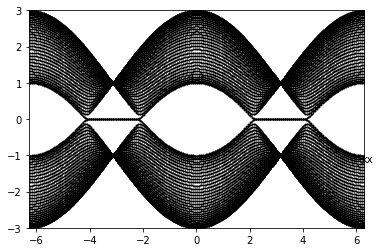

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath 
import functools

def sz(spin):
#turn spin number into z projection of spin
    if spin == 0 : 
    #spin up
        return 1
    if spin == 1 :
    #spin down
        return -1
    else :
        print("Wrong spin.")

def KMHam(N,t,t2,k):
#N 4-atom inferior struture in a cell, with nearest hopping term t and second nearest t2, k
    Ham = np.zeros((4*2*N,4*2*N),dtype = complex)
    #m is the order of inferior structure, num is the number of atom, spin=0 shows spin up,1 shows spin down
    #nearest hopping
    for spin in range(2):
        #intra cell
        #intra struture
        for m in range(N):
            Ham[8*m+2*0+spin, 8*m+2*1+spin] = t
            Ham[8*m+2*1+spin, 8*m+2*2+spin] = t
            Ham[8*m+2*2+spin, 8*m+2*3+spin] = t
            
        #inter structure
        for m in range(N-1):
            Ham[8*m+2*3+spin, 8*(m+1)+2*0+spin] = t
        #inter cell
        for m in range(N):
            Ham[8*m+2*0+spin, 8*m+2*1+spin] = Ham[8*m+2*0+spin, 8*m+2*1+spin] + t* cmath.exp(-k*1j)
            Ham[8*m+2*2+spin, 8*m+2*3+spin] = Ham[8*m+2*2+spin, 8*m+2*3+spin] + t* cmath.exp(k*1j)
            
    #second nearest hopping
    for spin in range(2):
        #intra cell
        #intra struture
        for m in range(N):
            Ham[8*m+2*0+spin, 8*m+2*2+spin] = -1j * t2 * sz(spin)
            Ham[8*m+2*1+spin, 8*m+2*3+spin] = -1j * t2 * sz(spin)
        #inter structure
        for m in range(N-1):
            Ham[8*m+2*2+spin, 8*(m+1)+2*0+spin] = 1j * t2 * sz(spin)
            Ham[8*m+2*3+spin, 8*(m+1)+2*1+spin] = 1j * t2 * sz(spin)
        #inter cell (leading diagonal will be calculated respectively after fill the lower half of matrix)
        for m in range(N):
            Ham[8*m+2*0+spin, 8*m+2*2+spin] = Ham[8*m+2*0+spin, 8*m+2*2+spin] + 1j * t2 * sz(spin) * cmath.exp(-k*1j)
            Ham[8*m+2*1+spin, 8*m+2*3+spin] = Ham[8*m+2*1+spin, 8*m+2*3+spin] + 1j * t2 * sz(spin) * cmath.exp(k*1j)
        for m in range(N-1):
            Ham[8*m+2*2+spin, 8*(m+1)+2*0+spin] = Ham[8*m+2*2+spin, 8*(m+1)+2*0+spin] -1j * t2 * sz(spin)* cmath.exp(k*1j)
            Ham[8*m+2*3+spin, 8*(m+1)+2*1+spin] = Ham[8*m+2*3+spin, 8*(m+1)+2*1+spin] -1j * t2 * sz(spin)* cmath.exp(-k*1j)
        
    Ham = Ham + Ham.conj().T
    
    #print(Ham)
    
    #leading diagonal
    for m in range(N):
        for spin in range(2):
            Ham[8*m+2*0+spin, 8*m+2*0+spin] = -2*t2*sz(spin)*math.sin(k)
            Ham[8*m+2*1+spin, 8*m+2*1+spin] = 2*t2*sz(spin)*math.sin(k)
            Ham[8*m+2*2+spin, 8*m+2*2+spin] = -2*t2*sz(spin)*math.sin(k)
            Ham[8*m+2*3+spin, 8*m+2*3+spin] = 2*t2*sz(spin)*math.sin(k)
    E,v = np.linalg.eig(Ham)
    E = sorted(E)
    return E

def main():
    # N : the number of units per cell
    # n : the number of kx 
    N = 17
    n = 500
    
    kk = np.linspace(-2*cmath.pi, 2*cmath.pi, n)
    E = np.zeros((n,(4*2*N)),dtype = complex)
    
    for i in range(n):
        #E[i] = KMHam(N,1,0.03,kk[i])
        E[i] = KMHam(N,1,0,kk[i])
        
    #plotting
    plt.text(-0.2,1.05,'E/t')
    plt.text(6.2,-1.2,'kx')
    plt.xlim(-2*cmath.pi,2*cmath.pi)
    plt.ylim(-3,3)
    plt.plot(kk,E.real,'k.', markersize = 1)
    plt.savefig("zigzag.png")
    plt.show()
    
if __name__ == '__main__':
    main()